<a href="https://colab.research.google.com/github/CIC-Research/Data-Science-Project/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network
### CIC Data Science Project
By: Neidy Malaga



#### Step 1: Beginning Setup

For our project, we will focus on the 'Walmart.csv' dataset. We will cluster and classify at least two topics. These two topics are Purchase Amount over Product Category and Gender over Purchase Amount. The purpose of the project is to see if the classification model can find any patterns between how Purchase Amounts are grouped to certain Product Categories and how Gender affects Purchase Amounts.

We start by using pandas to read our data from an Excel file and display it to prove it was read well. We then clean up the data and separate them into two datasets for convenience.

In [1]:
import pandas as pd

#try/catch for pd.read_csv
try:
    Walmart_Data = pd.read_csv('walmart.csv')
    #changing data types to conserve memory, implementing binary
    Walmart_Data['Purchase'] = Walmart_Data['Purchase'].astype('uint16')
    Walmart_Data['Product_Category'] = Walmart_Data['Product_Category'].astype('uint8')
    Walmart_Data['Gender'] = Walmart_Data['Gender'].map({'M': 0, 'F': 1})
    
    #seperating into individual sets 
    Purchase_PC_Data= Walmart_Data[['Purchase','Product_Category']]
    Purchase_Gender_Data = Walmart_Data[['Gender','Purchase']]
    
    #checking to see if datasets have read csv file successfully
    print(f'First set is empty: {Purchase_PC_Data.empty}')
    print(f'Second set is empty: {Purchase_Gender_Data.empty}')
except FileNotFoundError:
    print('File not found')
except pd.errors.EmptyDataError:
    print('Empty Data')
except pd.errors.DataError:
    print('Dara Error')
except pd.errors.ParserError:
    print('Parser Error')


First set is empty: False
Second set is empty: False


#### Step 2: Scatterplot Visual
Let's start by showing the scatterplot to identify the independent and dependent variable. Since we are measuring Purchase Amount over Product Category, Purchase Amount will be the explanatory value (x-val) and Product Category will be the response value (y-val). In addition, Purchase Amount over Gender will be denoted as the explanatory value over the response value. 

The following code block will show the scatterplot. Based on the scatterplot, we can see that the first graph has a few outliers to the right and the information is spread out. We can imply that 2-3 clusters can cover the data. For the second graph, the data is more clustered to the left and the scatterplot shows a few outliers to the right. Since they are split between two groups, we can assume that we will only need 2 clusters. 

We will use this information to confirm our methods in Step 3 when we perform a cluster.


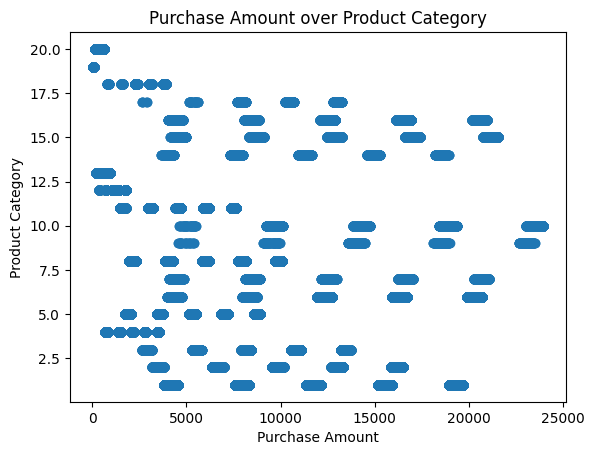

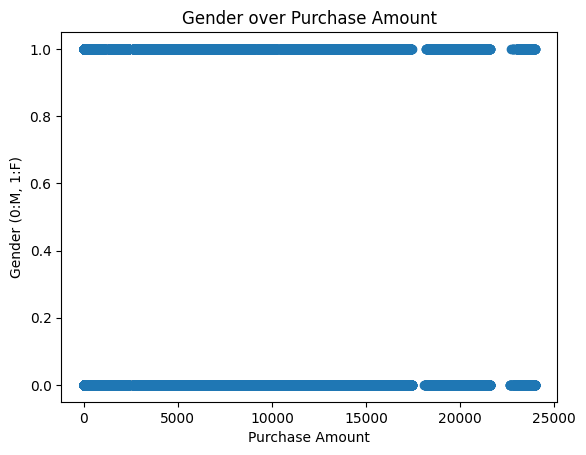

In [2]:
import matplotlib.pyplot as plt

#create scatterplot, annotate scatterplot, show scatterplot
plt.scatter(Purchase_PC_Data['Purchase'], Purchase_PC_Data['Product_Category'])
plt.xlabel('Purchase Amount')
plt.ylabel('Product Category')
plt.title('Purchase Amount over Product Category')
plt.show()

plt.scatter(Purchase_Gender_Data['Purchase'], Purchase_Gender_Data['Gender'])
plt.xlabel('Purchase Amount')
plt.ylabel('Gender (0:M, 1:F)')
plt.title('Gender over Purchase Amount')
plt.show()

#### Step 3: Clustering Data
##### Elbow Method
In order to cluster data, we will use K-Means++ algorithm and Elbow Method. To start, we test the inertias of the Kmeans++ algorithm over 1-10 cluster trials. We then graph it as the Elbow Method, which will show us how many centroids we need. You can see that the Elbow Method shows the optimal centroid amount by illustrating the most linear section. In both graphs, the most linear section resides at the number 2. 

##### Kmeans++
After, we employ the use of the Kmeans++ algorithm to show the clusters. The algorithm begins by placing one random centroid. It then fits the centroid by using its inertia calculation. The inertia calculates the distances from each data point towards the centroid. By using a smaller inertia, the model guarantees that it has found a tightly fit centroid. The new centroids will then be placed in a way to ensure that the total inertia is as low as possible.

Credit: https://www.w3schools.com/python/python_ml_k-means.asp

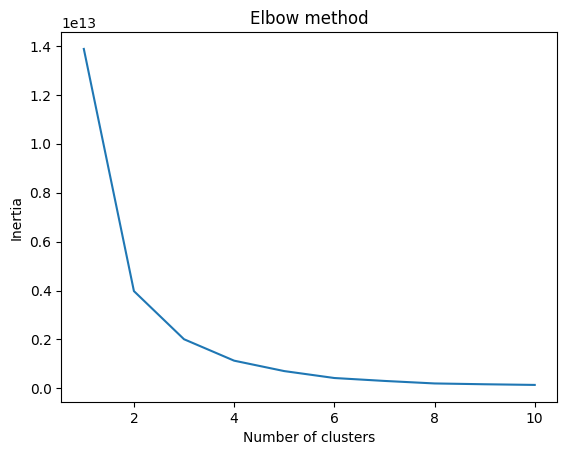

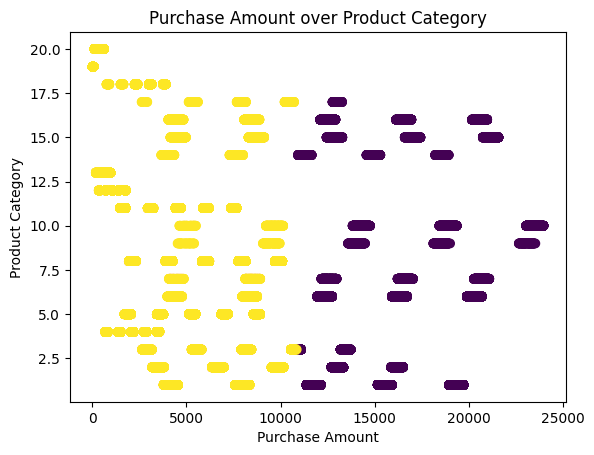

In [3]:
from sklearn.cluster import KMeans

#Elbow Method
#code will add in an addition centroid for each loop (starting at 1 and ending at 10)
#the Kmeans++ model will then attempt to fit these centroid with your model
#inertia will be taken from each attempt, so we can tell how well the centroids fit with the data

inertia = []

for index in range(1,11):
    kmeans = KMeans(n_clusters=index, init='k-means++')
    kmeans.fit(Purchase_PC_Data)
    inertia.append(kmeans.inertia_)

#displays Elbow Method graph (numbers 1-10, numerical data from inertia array)
plt.plot(range(1,11), inertia)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#KMeans++
#uses the Kmeans++ model to put in two centroid and fit into our data
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(Purchase_PC_Data)

#displays Clustering graph
plt.scatter(Purchase_PC_Data['Purchase'], Purchase_PC_Data['Product_Category'], c=kmeans.labels_)
plt.xlabel('Purchase Amount')
plt.ylabel('Product Category')
plt.title('Purchase Amount over Product Category')
plt.show()

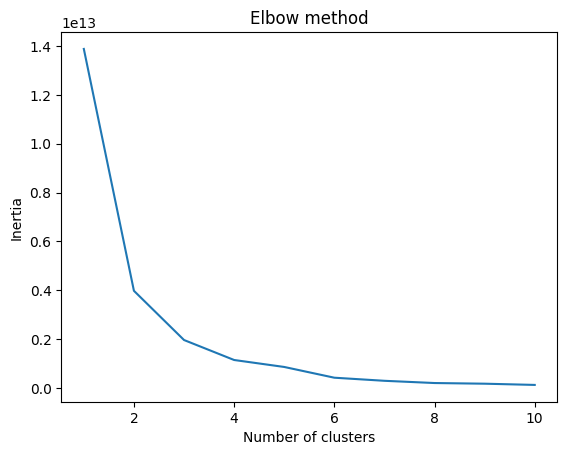

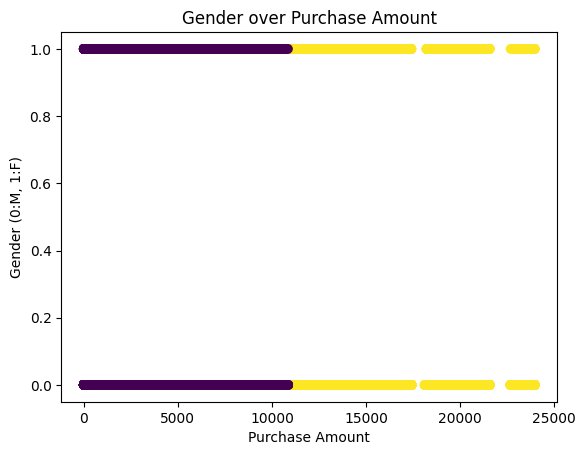

In [4]:
#Elbow Method
inertia.clear()

for index in range(1,11):
    kmeans = KMeans(n_clusters=index, init='k-means++')
    kmeans.fit(Purchase_Gender_Data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,11), inertia)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#KMeans++ Method
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(Purchase_Gender_Data)

plt.scatter(Purchase_Gender_Data['Purchase'], Purchase_Gender_Data['Gender'], c=kmeans.labels_)
plt.xlabel('Purchase Amount')
plt.ylabel('Gender (0:M, 1:F)')
plt.title('Gender over Purchase Amount')
plt.show()

#### Step 3: Classification
##### Decision Trees
As the Purchase over the Product Category contains one categorical and discrete column, we will use Decision Trees. The data is split into testing and training data in order to prevent overfitting, underfitting, and to get an accuracy score. The model will begin to fit its training data, in which it will group the information into binary trees. By doing this, it will be able to use the patterns in its binary trees to predict new data.

##### Accuracy Score
We then use the accuracy score to check the accuracy of our model when training/testing. We use the training and testing data to predict its accuracy. It is able to do this by making a confusion matrix and using set equations to calculate both accuracies. 

##### Learning Curve
A learning curve is a graph meant to show how the model will react to an increase in training data, as it offers insight on underfitting and overfitting problems. In order to further check the accuracy of our model, we will use a learning curve. This learning curve is created by using cross validation, which collects testing and training accuracy scores. The cross validation will split several parts of the data into testing and training data in order to test the accuracy of the model. The learning curve is then displayed and measured by accuracy. We can see that both graphs are not underfitting as both training and testing curves have high accuracy scores. We can also see that both graphs are not overfitting, as there is not a big gap in between the training and testing curves.

Credits: https://stats.stackexchange.com/questions/354709/sklearn-metrics-accuracy-score-vs-logisticregression-score
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LearningCurveDisplay.html

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#explanatory/response values, (drops Product Category)
x = Purchase_PC_Data.drop('Product_Category', axis=1)
y = Purchase_PC_Data['Product_Category']

#splits data into 80% training and 20% testing
#starts the Decision Tree Model and fits the training data to the model
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2)
dt = DecisionTreeClassifier()

dt.fit(X_train, Y_train)

#shows training/testing accuracy using the accuracy_score
print(f'Training Accuracy : {accuracy_score(Y_train, dt.predict(X_train))*100}')
print(f'Testing Accuracy : {accuracy_score(Y_test, dt.predict(X_test))*100}')


Training Accuracy : 87.44358646893335
Testing Accuracy : 86.6626065773447


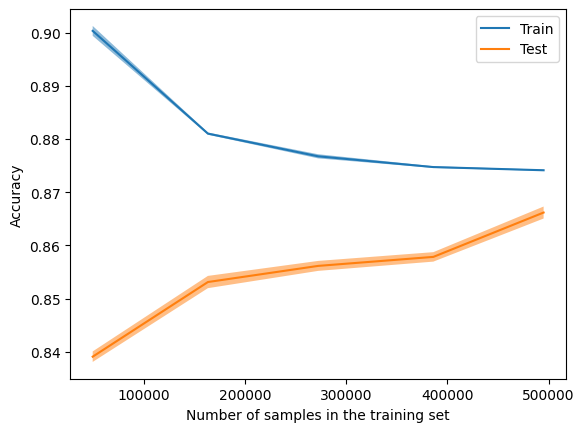

In [6]:
from sklearn.model_selection import LearningCurveDisplay, learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=dt, X= x, y= y, cv = 10, train_sizes=[0.1, 0.33, 0.55, 0.78, 1.])
LC_plt = LearningCurveDisplay(train_sizes = train_sizes, train_scores = train_scores, test_scores = test_scores, score_name='Accuracy')
LC_plt.plot()

##### Logistic Regression
Logistic Regression is a classification model that uses the sigmoid function to predict where new data points are based on the model's training data. Since we are comparing Purchase Amount over Gender, we are actually comparing discrete values over binary values. Thus, we will use Binomial Logistic Regression to deal with the binary values. 

Credit: https://www.geeksforgeeks.org/understanding-logistic-regression/

In [7]:
from sklearn.linear_model import LogisticRegression

#explanatory/response values
x = Purchase_Gender_Data.drop('Gender', axis=1)
y =  Purchase_Gender_Data['Gender']

#splits data into 80% training and 20% testing
#starts the Logistic Regression model and fits the training data to the model
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

lr = LogisticRegression()
lr.fit(X_train, Y_train)

print(f'Training Accuracy : {accuracy_score(Y_train, lr.predict(X_train))*100}')
print(f'Testing Accuracy : {accuracy_score(Y_test, lr.predict(X_test))*100}')


Training Accuracy : 75.282578956219
Testing Accuracy : 75.42221899031031


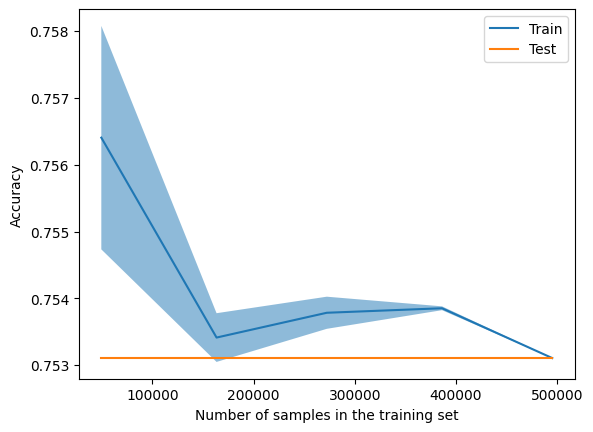

In [8]:
train_sizes, train_scores, test_scores = learning_curve(estimator=lr, X= x, y= y, cv = 10, train_sizes=[0.1, 0.33, 0.55, 0.78, 1.])
LC_plt = LearningCurveDisplay(train_sizes = train_sizes, train_scores = train_scores, test_scores = test_scores, score_name='Accuracy')
LC_plt.plot()